# Sarcasm Detection on YouTube Comments - Data Preprocessing

This notebook demonstrates the steps for generating a model  for sarcasm detection in YouTube comments using Machine Learning.





## Problem Description

Sarcasm is a powerful tool in human communication, using a layer of irony to convey a meaning opposite the surface level. It often employs positive language to express negativity, or vice versa. This complexity makes it a major challenge for Natural Language Processing (NLP) tasks like sentiment analysis, where the goal is to understand the emotional tone of text.

This project aims to develop a model that can effectively recognize and interpret sarcasm in text data.

In [36]:
import pickle
import numpy as np
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt

## Dataset Overview

We are using a dataset of YouTube comments which contains the following columns:
- `text`: The text of the YouTube comment.
- `labels`: The target label indicating whether the comment is sarcastic (1) or not (0).

Let's load the dataset and take a look at its structure.

In [3]:
# Load the dataset
file_path = '/content/sarcasm_training.csv'
df = pd.read_csv(file_path)



In [4]:
# Display the first few rows of the dataset
df.head()

,text,labels
0,<user> thanks for showing up for our appointme...,1
1,haha . # lol,1
2,i love waiting <num> min for a cab - such shor...,1
3,22 super funny quotes # funnyquotes # funnysa...,1
4,goog morning # sorrynotsorry # morning,1


### Data Cleaning:
- **Removing Mentions, Hashtags, URLs, HTML Tags, Punctuations, and Numbers**:
  This step involves eliminating various non-essential elements from the text data, including mentions (e.g., "@username"), hashtags (e.g., "#hashtag"), URLs, HTML tags, punctuations, and numeric characters.

In [5]:
# Check for missing values
print(df.isnull().sum())


text      0
labels    0
dtype: int64


-> There is no null values in this dataset.

In [6]:
# Check for duplicates
print(f'Duplicate rows: {df.duplicated().sum()}')

Duplicate rows: 356


In [7]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [8]:
# Display the cleaned dataset
df.reset_index(drop=True, inplace=True)
df.head()

,text,labels
0,<user> thanks for showing up for our appointme...,1
1,haha . # lol,1
2,i love waiting <num> min for a cab - such shor...,1
3,22 super funny quotes # funnyquotes # funnysa...,1
4,goog morning # sorrynotsorry # morning,1


In [9]:
df.shape

(19461, 2)

## Removing Text Emojis Followed by Numbers
### Finding the Problem:
-> We discovered a discrepancy in the number of emojis within our dataset. While we expected around 3,782 emojis, the dataset indicated a count of 7,993.

-> The issue occurred because I struggled to accurately recognize and map the emojis in the dataset.

In [10]:
import pandas as pd
import re


# Function to remove emoji followed by numbers
def remove_emoji_followed_by_numbers(text):
    return re.sub(r'emoji[_\d]+', '', text)

# Apply the function to the DataFrame column
df['text'] = df['text'].apply(remove_emoji_followed_by_numbers)

# Output the modified DataFrame
print(df)


                                                    text  labels
0      <user> thanks for showing up for our appointme...       1
1                                          haha .  # lol       1
2      i love waiting <num> min for a cab - such shor...       1
3      22 super funny quotes # funnyquotes  # funnysa...       1
4                goog morning  # sorrynotsorry # morning       1
...                                                  ...     ...
19456                                 such a good read         0
19457  this is some people 's living conditions , alw...       0
19458  winner - seungyoon ( simple ) - rt if u save -...       0
19459  ok but concept : kravitz passing notes between...       0
19460                   life is good, you should get one       1

[19461 rows x 2 columns]


In [11]:
import pandas as pd

def remove_empty_rows(df, column_name):
    """
    Removes rows with empty strings in the specified column of the DataFrame.

    Parameters:
        df (DataFrame): The input DataFrame.
        column_name (str): The name of the column to check for empty strings.

    Returns:
        DataFrame: The DataFrame with empty rows removed.
    """
    return df[df[column_name].str.strip().astype(bool)].reset_index(drop=True)


    # Specifying the column containing the text data
    text_column_name = 'text'

    # Removing rows with empty strings in the specified column
    df_cleaned = remove_empty_rows(df, text_column_name)

    # Saving the modified dataset
    df_cleaned.to_csv('comments_without_empty_strings.csv', index=False)


### Tokenization and Lemmatization:
- **Tokenization and Lemmatization**:
  - **Tokenization**: Splitting text into individual words or tokens.
  - **Lemmatization**: Converting tokens to their base or root forms. For example, "running" becomes "run" after lemmatization.

In [12]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

# Download NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

In [14]:
# Function to preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

In [15]:
# Apply preprocessing to the comments
df['cleaned_comment'] = df['text'].apply(preprocess_text)


In [16]:
# Filter out rows where 'cleaned_comment' is empty
df = df[df['cleaned_comment'].str.strip() != '']


In [17]:
# Display the first few rows of the preprocessed dataset
df.head()

,text,labels,cleaned_comment
0,<user> thanks for showing up for our appointme...,1,user thanks showing appointment today
1,haha . # lol,1,haha lol
2,i love waiting <num> min for a cab - such shor...,1,love waiting num min cab shortage user please ...
3,22 super funny quotes # funnyquotes # funnysa...,1,22 super funny quote funnyquotes funnysayings ...
4,goog morning # sorrynotsorry # morning,1,goog morning sorrynotsorry morning


### Droping the text column

In [18]:
df.drop('text',axis = 1,inplace = True )
df.head()

<ipython-input-18-00530f8f4228>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('text',axis = 1,inplace = True )


,labels,cleaned_comment
0,1,user thanks showing appointment today
1,1,haha lol
2,1,love waiting num min cab shortage user please ...
3,1,22 super funny quote funnyquotes funnysayings ...
4,1,goog morning sorrynotsorry morning


### TF-IDF

TF-IDF stands for Term Frequency-Inverse Document Frequency. It is a statistical measure used to evaluate the importance of a word in a document relative to a collection of documents (corpus). The TF-IDF score increases proportionally to the number of times a word appears in a document and is offset by the frequency of the word in the corpus.

**Formula:**

**Term Frequency (TF):**
\[ \text{TF}(t, d) = \frac{\text{Number of times term } t \text{ appears in document } d}{\text{Total number of terms in document } d} \]

**Inverse Document Frequency (IDF):**
\[ \text{IDF}(t, D) = \log \left( \frac{\text{Total number of documents } D}{\text{Number of documents containing term } t} \right) \]

**TF-IDF:**
\[ \text{TF-IDF}(t, d, D) = \text{TF}(t, d) \times \text{IDF}(t, D) \]


In [19]:
# Define the text and target columns
text_column = 'cleaned_comment'
target_column = 'labels'

In [20]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split



# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(df[text_column])
y = df[target_column]



###  Examine Class Distribution
We examine and visualize the class distribution to identify any imbalance. The plot shows the proportion of each class.

In [21]:
# Check the distribution of the labels
label_distribution = df['labels'].value_counts(normalize=True)
label_distribution

labels
0    0.567868
1    0.432132
Name: proportion, dtype: float64

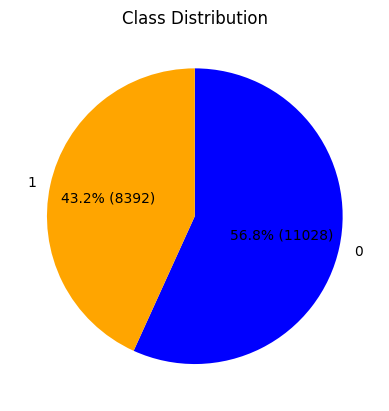

labels
0    0.567868
1    0.432132
Name: proportion, dtype: float64


In [29]:
# Plot the distribution as a pie chart with percentages
label_distribution.plot(kind='pie',
                        autopct=lambda p: f'{p:.1f}% ({p * len(df) / 100:.0f})',
                        colors=['blue', 'orange'],
                        startangle=90,
                        counterclock=False)

plt.title('Class Distribution')
plt.ylabel('')  # Hide the y-label as it's redundant in a pie chart
plt.show()

print(label_distribution)

## Apply SMOTE to the TF-IDF Vectorized Data

In [22]:
# Apply SMOTE to the TF-IDF vectorized data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

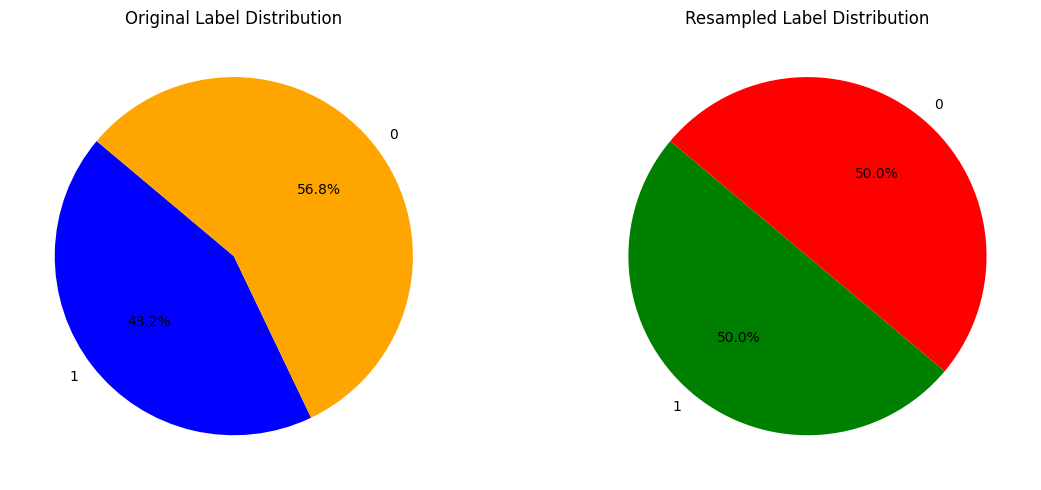

In [37]:
# Function to plot label distribution using pie charts
def plot_label_distribution_pie(y_original, y_resampled):
    original_counts = Counter(y_original)
    resampled_counts = Counter(y_resampled)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.pie(original_counts.values(), labels=original_counts.keys(), autopct='%1.1f%%', colors=['blue', 'orange'], startangle=140)
    plt.title('Original Label Distribution')

    plt.subplot(1, 2, 2)
    plt.pie(resampled_counts.values(), labels=resampled_counts.keys(), autopct='%1.1f%%', colors=['green', 'red'], startangle=140)
    plt.title('Resampled Label Distribution')

    plt.tight_layout()
    plt.show()

# Plot the label distributions using pie charts
plot_label_distribution_pie(y, y_resampled)

## Split the data into training and testing sets

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


# Building Machine Learning model


## Support Vector Machine (SVM)

Support Vector Machines (SVM) are supervised learning models used for classification and regression analysis. SVMs are particularly well-suited for binary classification tasks, which makes them a good choice for detecting sarcasm in text data.

### How SVM Works

SVM works by finding the hyperplane that best separates the classes in the feature space. The optimal hyperplane is the one that maximizes the margin between the closest points of the two classes, known as support vectors. The larger the margin, the better the generalization performance of the classifier.

### Key Features of SVM

- **Margin Maximization**: SVM aims to maximize the distance between the support vectors and the hyperplane, ensuring robust separation between classes.
- **Kernel Trick**: SVM can use kernel functions to transform the input space into a higher-dimensional space where a linear separation is possible. Common kernels include linear, polynomial, and radial basis function (RBF).
- **Regularization Parameter (C)**: This parameter controls the trade-off between achieving a low error on the training data and minimizing the model complexity. A smaller C value encourages a larger margin and a simpler model, while a larger C value focuses on classifying all training examples correctly.

### Advantages of SVM

- Effective in high-dimensional spaces, making it suitable for text classification tasks.
- Versatile with different kernel functions to handle various types of data.
- Robust to overfitting, especially in high-dimensional spaces.

### Disadvantages of SVM

- Training time can be high for large datasets.
- Choosing the right kernel and tuning the hyperparameters can be complex.

In this notebook, we will train an SVM model to detect sarcasm in YouTube comments and evaluate its performance using metrics such as accuracy and classification report.


In [41]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

def build_and_evaluate_svm_model(X_train, X_test, y_train, y_test):
    model = SVC(random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    print("Model: SVM")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))
        # Compute and print confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Class 0', 'Class 1'],
                yticklabels=['Class 0', 'Class 1'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

    return model


Model: SVM
Accuracy: 0.8136899365367181
              precision    recall  f1-score   support

           0       0.79      0.85      0.82      2189
           1       0.84      0.78      0.81      2223

    accuracy                           0.81      4412
   macro avg       0.82      0.81      0.81      4412
weighted avg       0.82      0.81      0.81      4412

Confusion Matrix:
[[1857  332]
 [ 490 1733]]


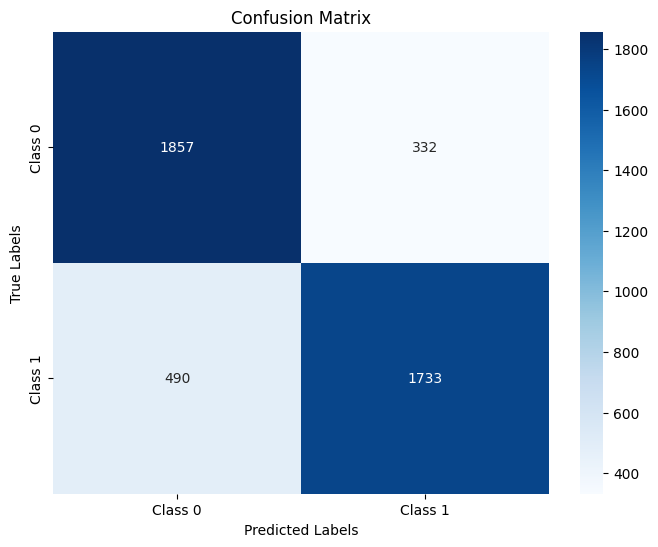

In [42]:
#function call
svm_model = build_and_evaluate_svm_model(X_train, X_test, y_train, y_test)

## Hyperparameter Tuning and Model Evaluation

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Function to perform hyperparameter tuning and evaluate models
def tune_and_evaluate_model(X_train, X_test, y_train, y_test, model, param_grid):
    with joblib.parallel_backend('threading'):
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
        grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    print(f"Best Model: {best_model}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))

    return best_model

# Define the parameter grid for GridSearchCV
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear']
}

# Create the SVM model
svm_model = SVC(random_state=42)

# Perform hyperparameter tuning
svm_best_model = tune_and_evaluate_model(X_train, X_test, y_train, y_test, svm_model, svm_param_grid)


Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=  28.5s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=  28.6s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=  17.8s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=  26.6s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=  18.8s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=  18.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=  26.2s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=  26.6s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=  17.1s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=  25.7s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=  21.6s
[CV] END ...................C=0.1, gamma=0.01, k

### Conclusion

- The SVM model outperforms both the Random Forest and Logistic Regression models in terms of accuracy and F1-score.
- SVM shows a balanced performance with good precision and recall for both classes (0 and 1), indicating robust classification capabilities.
- Random Forest and Logistic Regression models also perform reasonably well, but SVM provides slightly better performance metrics across accuracy, precision, recall, and F1-score.
- The SVM model achieved an accuracy of 81%, demonstrating its effectiveness in detecting sarcasm in YouTube comments.

In summary, based on this evaluation, the SVM model is recommended for this classification task due to its superior performance metrics compared to Random Forest and Logistic Regression models.
